# Capstone 2 - Heart Health

[Data Source](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss
import numpy as np

In [2]:
dataframe = pd.read_csv(r'heart_disease_cap2.csv')
display(dataframe.head())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## Data Cleansing

In [3]:
dataframe.isna().sum() #finding NA values in columns

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
dataframe.dtypes #check data types

HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

## Exploration of Variables

i.e. heart disease/no heart disease, age, sex, etc.

### Count plot of those with Heart Disease or Attack (1) and those without Heart Disease or Attack (0).

In [5]:
hd_percentages= dataframe['HeartDiseaseorAttack'].value_counts(normalize=True)
display(hd_percentages)

0    0.905814
1    0.094186
Name: HeartDiseaseorAttack, dtype: float64

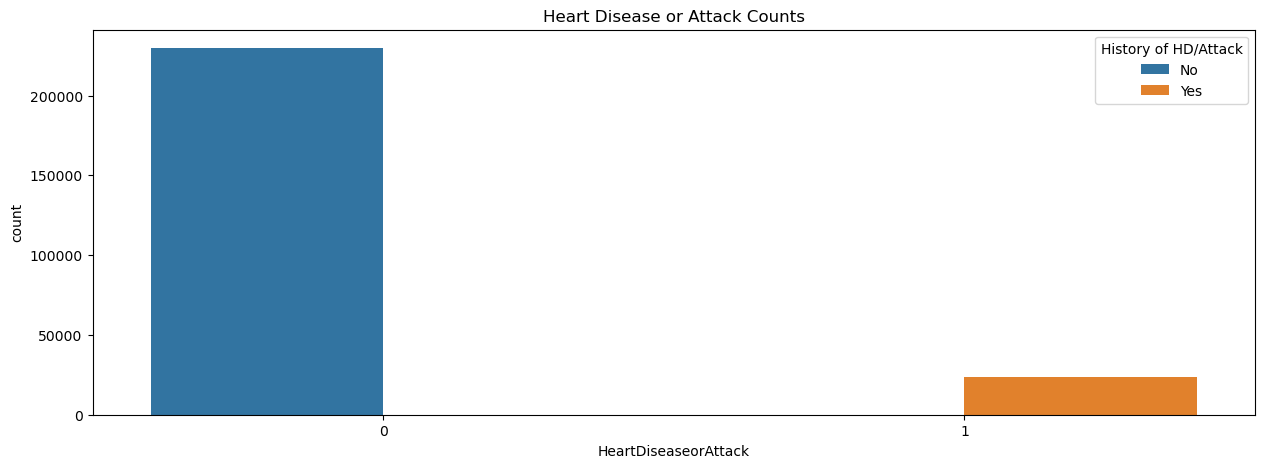

In [33]:
sns.countplot(x='HeartDiseaseorAttack', data=dataframe, hue='HeartDiseaseorAttack').set_title('Heart Disease or Attack Counts')
plt.legend(title='History of HD/Attack', labels=['No', 'Yes'])
plt.show()

### See counts of the top 3 causes of heart disease (high blood pressure, high cholesterol, smoking).

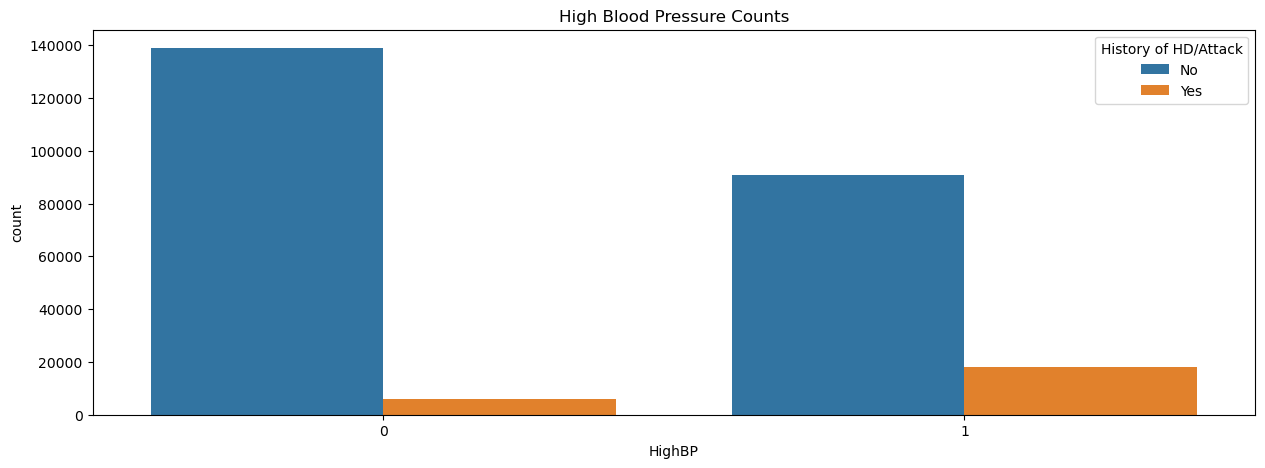

In [34]:
sns.countplot(x='HighBP', data=dataframe, hue='HeartDiseaseorAttack').set_title('High Blood Pressure Counts')
plt.legend(title='History of HD/Attack', labels=['No', 'Yes'])
plt.show()

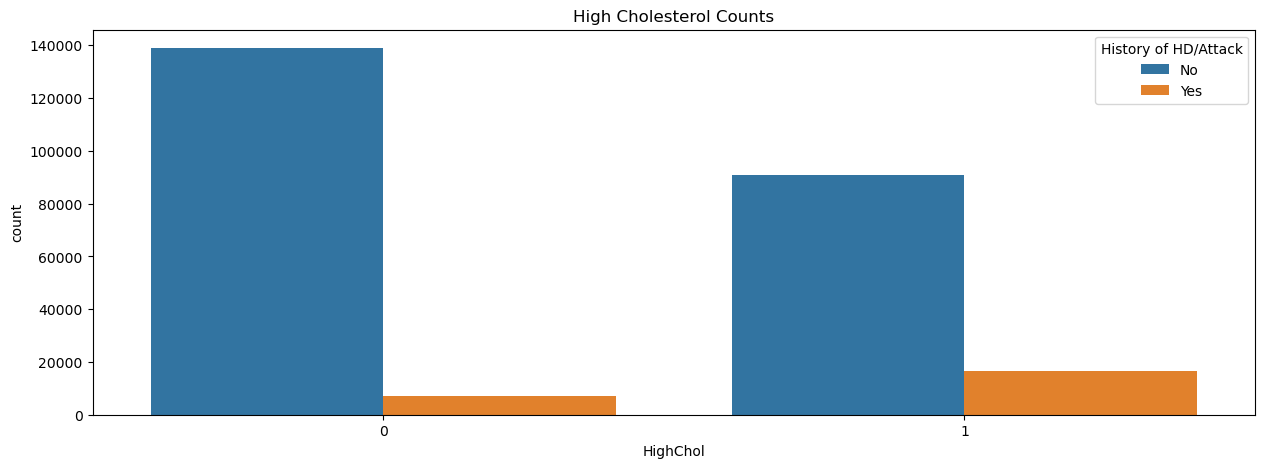

In [35]:
sns.countplot(x='HighChol', data=dataframe, hue='HeartDiseaseorAttack').set_title('High Cholesterol Counts')
plt.legend(title='History of HD/Attack', labels=['No', 'Yes'])
plt.show()

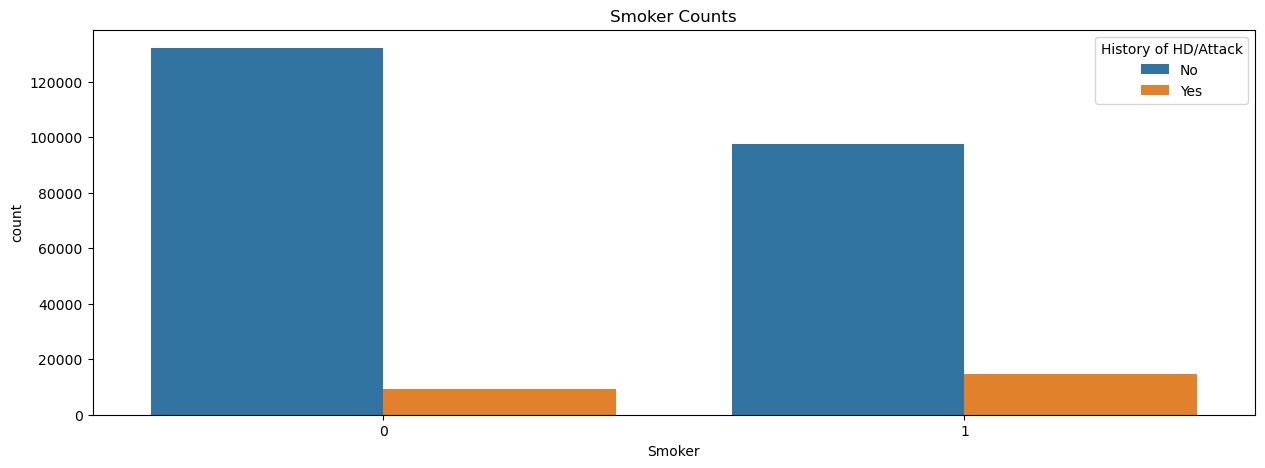

In [36]:
sns.countplot(x='Smoker', data=dataframe, hue='HeartDiseaseorAttack').set_title('Smoker Counts')
plt.legend(title='History of HD/Attack', labels=['No', 'Yes'])
plt.show()

In [10]:
hd_df = dataframe[dataframe['HeartDiseaseorAttack'] == 1]
nhd_df = dataframe[dataframe['HeartDiseaseorAttack'] == 0]

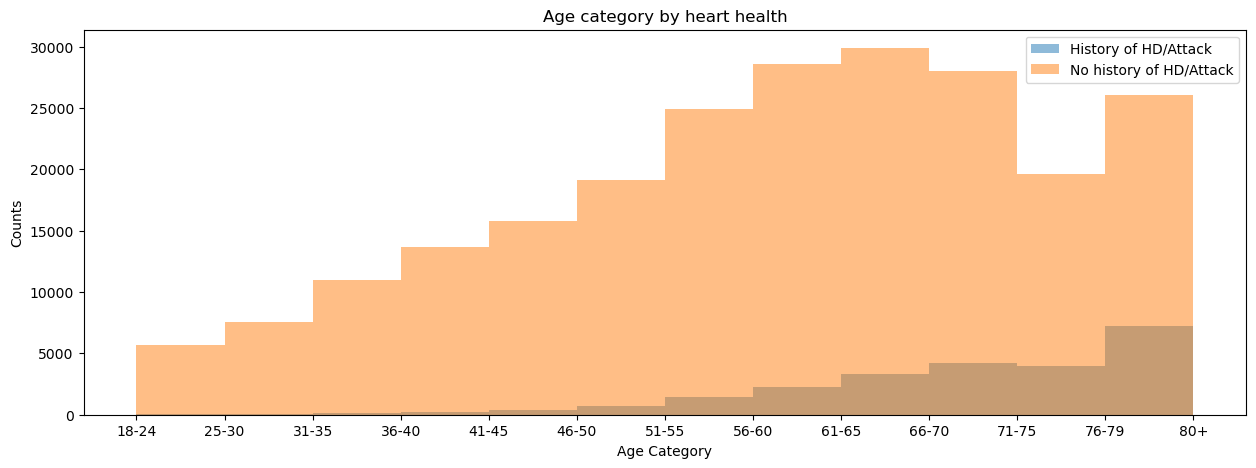

In [12]:
fig, ax = plt.subplots()
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
labels = ['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-79', '80+']
ax.hist(hd_df['Age'], label='History of HD/Attack', bins=bins, alpha=0.5)
ax.hist(nhd_df['Age'], bins=bins, label='No history of HD/Attack', alpha=0.5)
ax.legend()
ax.set_ylabel('Counts')
ax.set_xlabel('Age Category')
ax.set_title('Age category by heart health')
plt.xticks(ticks=bins, labels=labels)
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

## Initial Correlations

Tetrachoric Correlation, phi coefficient 

In [13]:
binary_df = dataframe.drop(columns=['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education'])
display(binary_df.head())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0,1,1,1,1,0,0,0,1,0,1,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,1,1,1,0,0,0,1,0,0,1,1,1,0
3,0,1,0,1,0,0,1,1,1,0,1,0,0,0
4,0,1,1,1,0,0,1,1,1,0,1,0,0,0


### Setting up Cramer's V 
Cramer's V for ALL data, including those without Heart Disease or Attack 
https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix 

In [14]:
def contingency_table_matrix(df):
    columns = df.columns
    matrix = np.zeros((len(columns), len(columns)))
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, _, _, _ = ss.chi2_contingency(contingency_table)
            min_categories = min(contingency_table.shape[0], contingency_table.shape[1])
            n = contingency_table.sum().sum()
            V = np.sqrt(chi2 / (n * (min_categories - 1)))
            matrix[i, j] = V
    return pd.DataFrame(matrix, columns=columns, index=columns)

In [15]:
cramers_v_matrix = contingency_table_matrix(binary_df)
print(cramers_v_matrix)

                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              0.999977  0.209348  0.180752   0.044170   
HighBP                            0.209348  0.999992  0.298191   0.098487   
HighChol                          0.180752  0.298191  0.999992   0.085621   
CholCheck                         0.044170  0.098487  0.085621   0.999945   
Smoker                            0.114428  0.096983  0.091291   0.009908   
Stroke                            0.202968  0.129555  0.092600   0.024105   
PhysActivity                      0.087283  0.125258  0.078037   0.004165   
Fruits                            0.019776  0.040546  0.040851   0.023828   
Veggies                           0.039150  0.061256  0.039863   0.006094   
HvyAlcoholConsump                 0.028961  0.003954  0.011525   0.023685   
AnyHealthcare                     0.018703  0.038406  0.042211   0.117577   
NoDocbcCost                       0.030975  0.017344  0.013296   0.058218   

#### Heatmap of Cramer's Matrix

<Axes: >

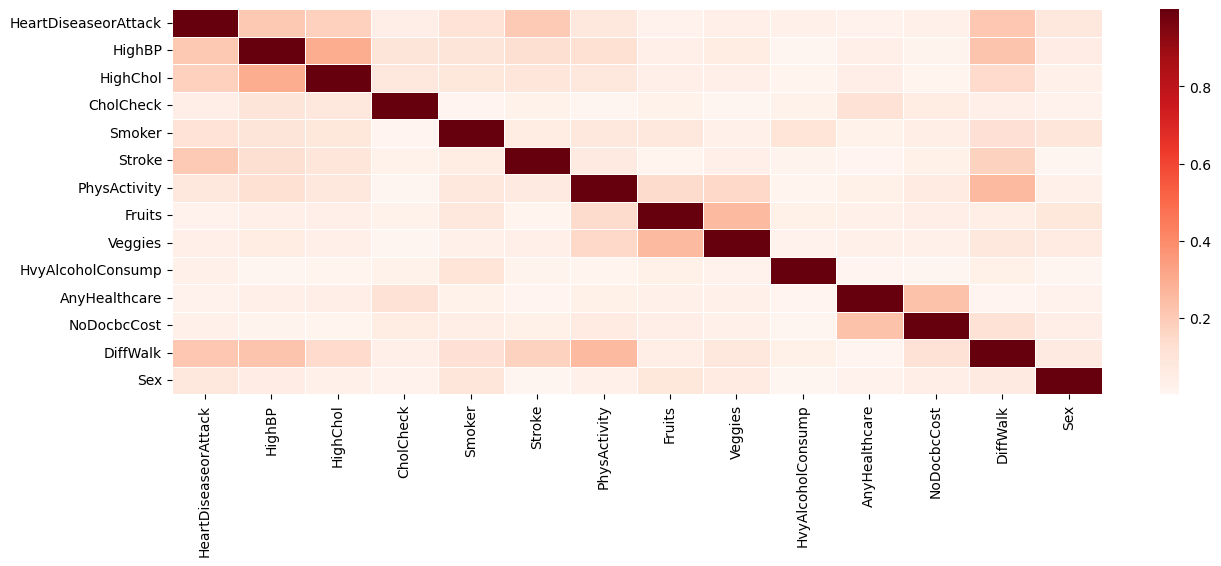

In [38]:
sns.heatmap(cramers_v_matrix, linewidth=.5, cmap='Reds')

### Cramer's V for specific variables
Based on highest associations from initial analysis (HighBP, HighChol, Smoker, Stroke, DiffWalk)

#### Subsetting Heart Disease/Attack DF for binary variables

In [17]:
binary_hd_df = hd_df.drop(columns=['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education'])
display(binary_hd_df.head())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
8,1,1,1,1,1,0,0,1,1,0,1,0,1,0
20,1,1,1,1,0,1,0,1,0,0,1,0,1,0
26,1,1,1,1,1,1,0,0,1,0,1,0,1,1
27,1,1,1,1,1,0,0,0,1,0,1,0,0,1
47,1,1,1,1,1,0,0,1,1,0,1,0,0,1


In [18]:
yes_no = binary_df.replace(0, 2)
display(yes_no.head())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,2,1,1,1,1,2,2,2,1,2,1,2,1,2
1,2,2,2,2,1,2,1,2,2,2,2,1,2,2
2,2,1,1,1,2,2,2,1,2,2,1,1,1,2
3,2,1,2,1,2,2,1,1,1,2,1,2,2,2
4,2,1,1,1,2,2,1,1,1,2,1,2,2,2


#### Cramer's V - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html 

In [19]:
from scipy.stats.contingency import association #Import association
hd_bp = yes_no[['HeartDiseaseorAttack', 'HighBP']] #subset HD/Attack and High BP
association(hd_bp, method='cramer') #Calculating Cramer's V

0.1661048276938661

In [20]:
hd_hc = yes_no[['HeartDiseaseorAttack', 'HighChol']] #subset HD/Attack and High Chol
association(hd_hc, method="cramer") 

0.1680791149725333

In [21]:
hd_smoke = yes_no[['HeartDiseaseorAttack', 'Smoker']] #subset HD/Attack and Smoker
association(hd_smoke, method='cramer')

0.1750688651376673

In [22]:
hd_stroke = yes_no[['HeartDiseaseorAttack', 'Stroke']] #subset HD/Attack and Stroke
association(hd_stroke, method='cramer')

0.09356129775634744

In [23]:
hd_diffwalk = yes_no[['HeartDiseaseorAttack', 'DiffWalk']] #subset HD/Attack and Difficulty Walking
association(hd_diffwalk, method='cramer')

0.1266694857136453

https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix 

## More Complex Correlations

logistic regression or lassso regression

In [25]:
y = binary_df['HeartDiseaseorAttack'].astype(int) #set dependent variable

X = binary_df.drop(columns=['HeartDiseaseorAttack']) #set independent variables

display(y.info(), X.info())


<class 'pandas.core.series.Series'>
RangeIndex: 253680 entries, 0 to 253679
Series name: HeartDiseaseorAttack
Non-Null Count   Dtype
--------------   -----
253680 non-null  int32
dtypes: int32(1)
memory usage: 991.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   HighBP             253680 non-null  int64
 1   HighChol           253680 non-null  int64
 2   CholCheck          253680 non-null  int64
 3   Smoker             253680 non-null  int64
 4   Stroke             253680 non-null  int64
 5   PhysActivity       253680 non-null  int64
 6   Fruits             253680 non-null  int64
 7   Veggies            253680 non-null  int64
 8   HvyAlcoholConsump  253680 non-null  int64
 9   AnyHealthcare      253680 non-null  int64
 10  NoDocbcCost        253680 non-null  int64
 11  DiffWalk           253680 non-null  int64
 12  Sex    

None

None

#### Setting up logistic regression

In [26]:
from sklearn.model_selection import train_test_split # Split Training (70%) and Test (30%)
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.linear_model import LogisticRegression
# Create an instance of the model. 
logreg = LogisticRegression() 
# Training the model. 
logreg.fit(X_train,y_train) 
# Do prediction. 
y_pred=logreg.predict(X_test)

In [31]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
display(cnf_matrix)

array([[68441,   455],
       [ 6692,   516]], dtype=int64)

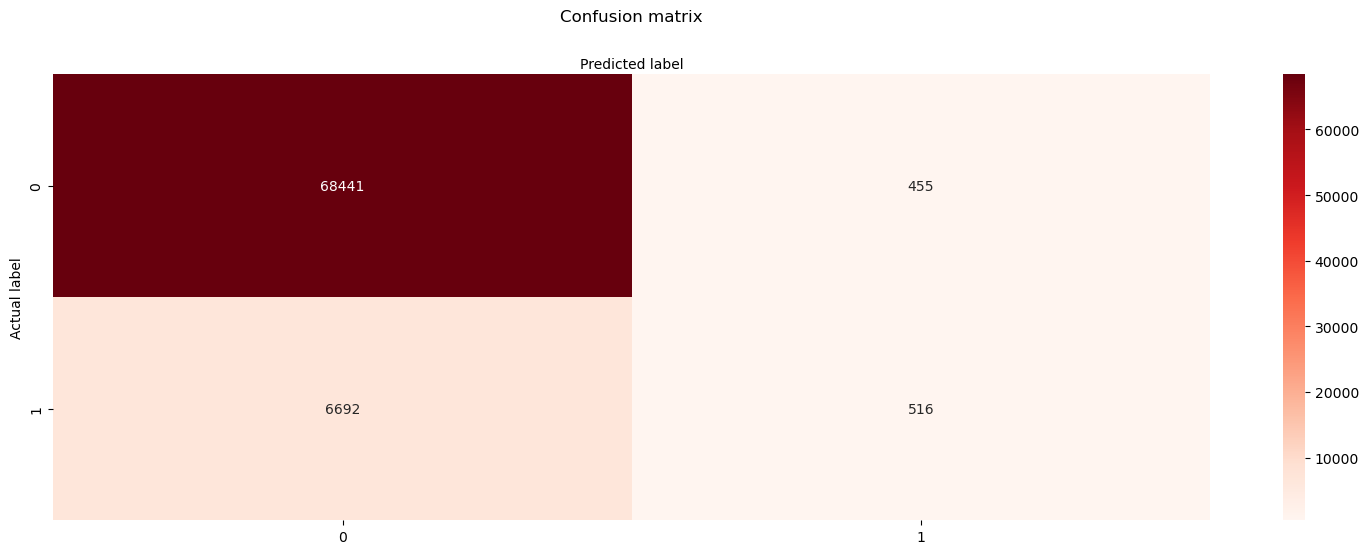

In [37]:
variables=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(variables))
plt.xticks(tick_marks, variables)
plt.yticks(tick_marks, variables)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9060890360559235


## Insights

#### Exploratory Analysis
1. There is a small percentage of those with a history of HD or Attack (9.42%) vs no history (90.6%). This may skew results.
2. Preliminary analysis shows a higher count of High BP, High Chol, and is a Smoker for those with a history.
3. Those with a history of HD or Attack tend to be older.
#### Initial Correlations w/Cramer's V Matrix
1. High BP has one of the strongest correlations, but still small (0.209348).
2. High Chol has one of the strongest corr as well, but even smaller (0.180752).
3. History of a Strokethe also has a stronger correlation, but still small (0.202968).
4. Difficulty Walking has strongest correlation (0.212691).
5. All of the above correlations are the strongest, but are still weak. This means that according to Cramer's V, these variables had the largest impact on History of Heart Disease or Attack, but they still may not be a large factor in this dataset.
#### Logistic Regression/Confusion Matrix
1. The number of entries classified correctly as a 0 (no history of HD or Attack) was 68441.
2. The number of entries incorrectly identified as 1 (history of HD/Attack) was 455. 
3. The number of entries incorrectly identified as 0 was 6682. 
4. The number of entries classified correctly as 1 was 516. 
5. The accuracy of the model was about 90.61%. This means this logistic regression model was able to pretty accurately predict (with the given dataset) whether someone did or did not have a history of HD or Attack, making it a good model to use for other datasets. 